In [1]:
import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
files = commands.getoutput("find /Volumes/HD-PLFU3/AnalysisResult/ -maxdepth 3 -type f -name shift_phase.npy").split('\n')
for f in files : print f
print len(files)

/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0008/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0014/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0015/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0017/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0034/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0035/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0036/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0038/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0006/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0011/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0017/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0022/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20161019-1/C001H001S0018/shift_phase.npy
/Volumes/HD-PLFU3/Analysi

In [24]:
def phase_add(a, b):
    a_ = np.cos(a) + np.sin(a)*1j
    b_ = np.cos(b) + np.sin(b)*1j
    return np.angle(a_*b_)

def phase_mean(X):
    a = 1
    for x in X : a *= ( np.cos(x) + np.sin(x)*1j)
    return np.angle(a)

def phase_var(X):
    a = 0
    for x in X: a += ( np.cos(x) + np.sin(x)*1j)
    return np.angle(a)

#print phase_add(np.pi/4, -np.pi/2)/np.pi
#X = np.arange(-np.pi, 2*np.pi+0.1*np.pi, 0.2*np.pi)
#print X
#print phase_mean(X)/np.pi

In [4]:
list_data = [ np.load(f) for f in files]
list_phase = []
for d in list_data : list_phase.extend(list(d))
list_phase = np.array(list_phase)
print list_phase.shape

(2123,)


(2123,)
mean 2.55429917248
var 2.50090837931


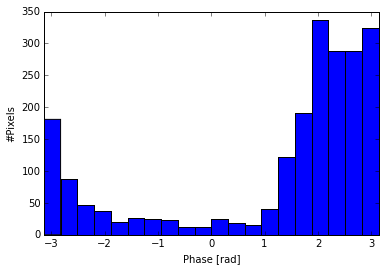

In [27]:
print list_phase.shape
print "mean", phase_mean(list_phase)
print "var", phase_var(list_phase)
plt.hist(list_phase, np.arange(-np.pi, np.pi+0.05*np.pi, 0.1*np.pi))
plt.xlim(-np.pi, np.pi)
plt.xlabel("Phase [rad]")
plt.ylabel("#Pixels")
plt.savefig("/Users/tomii/tmp/AnalysisResult/phase_shift_total.png")
plt.show()

(45,)
2.55429917248
-2.64090385289


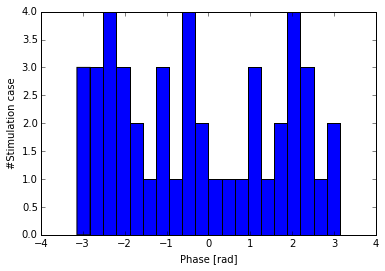

In [28]:
means = np.array([phase_mean(d) for d in list_data])
print means.shape
print phase_mean(means)
print phase_var(means)
plt.hist(means, np.arange(-np.pi, np.pi+0.05*np.pi, np.pi*0.1))
plt.xlabel("Phase [rad]")
plt.ylabel("#Stimulation case")
plt.savefig("/Users/tomii/tmp/AnalysisResult/phase_shift_means.png")

In [4]:
np.sqrt(2.50090837931)

1.5814260587551985